In [3]:
import json
import os
import requests

url = "http://174.138.47.31:8001/inference/process"
file_path = 'c:/Users/wbrya/OneDrive/Documents/GitHub/ocr-inference/dataset/hard/Schedule of Values Template v1.png'

with open(file_path, "rb") as f:
    filename = os.path.basename(file_path)
    files = {
        'file': (
            filename,   # e.g. 'staircase_schedule_of_values.png'
            f,
            'image/png' # explicitly tell the server it's a PNG
        )
    }
    response = requests.post(url, files=files)
try:
    data = response.json()
    print(json.dumps(data, indent=2))
except Exception as e:
    print("Status code:", response.status_code)
    print("Response text:", response.text)
    print("Error decoding JSON:", e)

[
  {
    "text": "mastt",
    "box": [
      [
        2639.0,
        85.0
      ],
      [
        2949.0,
        85.0
      ],
      [
        2949.0,
        204.0
      ],
      [
        2639.0,
        204.0
      ]
    ],
    "confidence": 0.9994457364082336,
    "page_number": 1
  },
  {
    "text": "POWERED BY",
    "box": [
      [
        2297.0,
        119.0
      ],
      [
        2563.0,
        119.0
      ],
      [
        2563.0,
        179.0
      ],
      [
        2297.0,
        179.0
      ]
    ],
    "confidence": 0.9994601011276245,
    "page_number": 1
  },
  {
    "text": " SCHEDULE OF VALUES",
    "box": [
      [
        54.0,
        185.0
      ],
      [
        434.0,
        185.0
      ],
      [
        434.0,
        232.0
      ],
      [
        54.0,
        232.0
      ]
    ],
    "confidence": 0.9951611757278442,
    "page_number": 1
  },
  {
    "text": "Project Name:",
    "box": [
      [
        54.0,
        279.0
      ],
      [


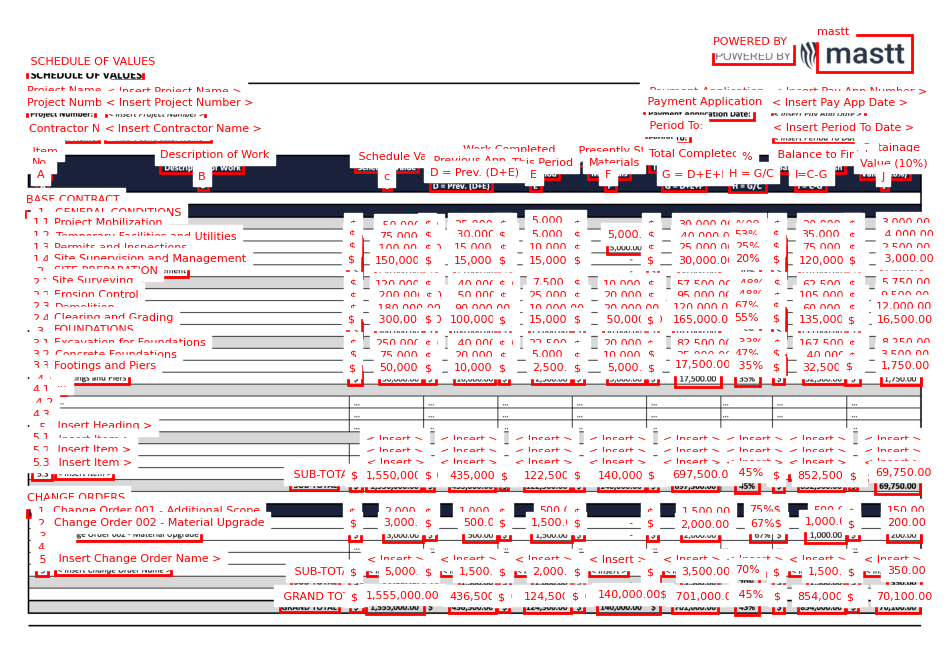

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Reload the image
img = Image.open(file_path)
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.imshow(img)

# Draw bounding boxes if present in data
if isinstance(data, list):
    for item in data:
        box = item.get('box')
        if box and len(box) == 4:
            # box is [[x1, y1], [x2, y2], [x3, y3], [x4, y4]]
            xs = [pt[0] for pt in box]
            ys = [pt[1] for pt in box]
            min_x, min_y = min(xs), min(ys)
            max_x, max_y = max(xs), max(ys)
            rect = patches.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            # Optionally, show text
            ax.text(min_x, min_y - 5, item.get('text', ''), color='red', fontsize=8, backgroundcolor='white')
plt.axis('off')
plt.show()